In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('CC GENERAL.csv')
data=data.drop("CUST_ID", axis=1)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [21]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [22]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative[0].value_counts()

0    8920
2      20
1       7
4       2
3       1
Name: 0, dtype: int64

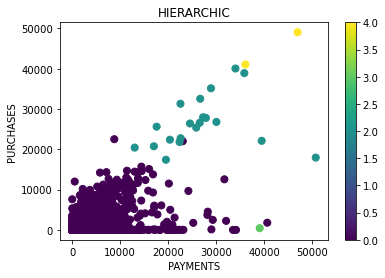

In [23]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PAYMENTS'] , data ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("HIERARCHIC")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)


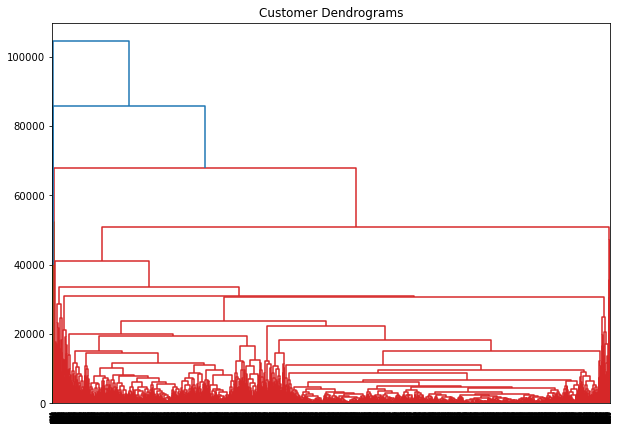

In [24]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [25]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[7.87525310e+02 8.49448814e-01 5.09892313e+02 2.49369084e+02
  2.60819413e+02 4.83252005e+02 4.51462729e-01 1.30904213e-01
  3.47030392e-01 1.09189353e-01 2.28054545e+00 9.50563636e+00
  2.22747849e+03 9.04173576e+02 5.26793626e+02 1.48620153e-01
  1.13792727e+01]
 [5.48720526e+03 9.54910300e-01 2.40789541e+03 1.55343184e+03
  8.54576730e+02 4.13952954e+03 5.31917954e-01 3.25465421e-01
  4.01272510e-01 3.11313742e-01 9.66793893e+00 3.05114504e+01
  1.13739880e+04 5.66199017e+03 1.97499024e+03 1.07193598e-01
  1.17302799e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [5.14958549e+03 9.04434585e-01 1.95473678e+04 1.43043888e+04
  5.24297902e+03 4.86981405e+03 8.28861756e-01 6.90243927e-01
  6.98373976e-01 1.40243878e-01 7.80487805e+00 1.10658537e+02
  1.48926829e+04

In [26]:
labels=pd.DataFrame(kmeans.labels_)
labels
labels[0].value_counts()

0    5503
4    2564
1     786
2      56
3      41
Name: 0, dtype: int64

In [54]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)

In [55]:
labels=pd.DataFrame(kmeans.labels_)
labels
labels[0].value_counts()

1    7024
0    1926
Name: 0, dtype: int64

In [49]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[3.83216246e+03 9.39914639e-01 2.36357346e+03 1.55094868e+03
  8.13007335e+02 2.59067028e+03 5.57392588e-01 3.45944653e-01
  4.05701795e-01 2.27637859e-01 6.58061172e+00 2.79787455e+01
  9.80871153e+03 4.29109359e+03 1.76347138e+03 1.49304347e-01
  1.17387247e+01]
 [9.41434029e+02 8.60059487e-01 6.29447379e+02 3.29089084e+02
  3.00635845e+02 5.36033824e+02 4.71930937e-01 1.63035042e-01
  3.53100049e-01 1.09731828e-01 2.33342829e+00 1.10642359e+01
  3.03437089e+03 1.03035436e+03 6.17136059e+02 1.54926366e-01
  1.14564877e+01]]


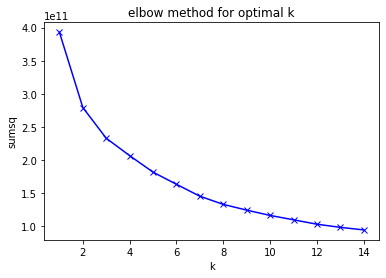

In [50]:
sumsq=[]
K=range(1,15)
for k in K :
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    sumsq.append(km.inertia_)

plt.plot(K,sumsq,'bx-')
plt.xlabel('k')
plt.ylabel('sumsq')
plt.title('elbow method for optimal k')
plt.show()



In [64]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,0
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [76]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data)
 
print(label)

[0 1 1 ... 0 0 0]


In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)
kmeans.predict(data)
labels=pd.DataFrame(kmeans.labels_)
labels

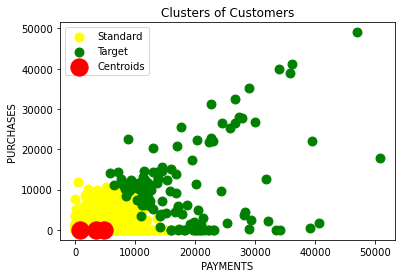

In [78]:

plt.scatter(data["PAYMENTS"][label == 1],
           data["PURCHASES"][label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PAYMENTS"][label == 2],
           data["PURCHASES"][label == 2],s=80,c='green',label='Target')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [80]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data)
 
print(label)

[0 1 2 ... 0 0 0]


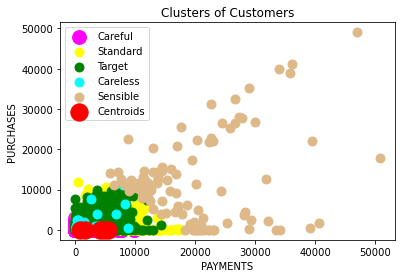

In [81]:

plt.scatter(data["PAYMENTS"][label == 0],          
            data["PURCHASES"][label== 0],s=190,c='magenta',label='Careful')
plt.scatter(data["PAYMENTS"][label == 1],
           data["PURCHASES"][label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PAYMENTS"][label == 2],
           data["PURCHASES"][label == 2],s=80,c='green',label='Target')
plt.scatter(data["PAYMENTS"][label == 3], 
           data["PURCHASES"][label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["PAYMENTS"][label == 4], 
           data["PURCHASES"][label == 4],s=80,c='burlywood',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()